In [20]:
# Let's start importing the libraries we need for the project 
import pandas as pd
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib import colors
import plotly.graph_objs as go
from plotly.offline import iplot
from plotly.subplots import make_subplots
from scipy import stats

In [1]:

data = pd.read_csv("CBM03.20230807224929.csv")
df3 = data.copy()
df3.head()

,STATISTIC,Statistic Label,TLIST(D1),Daily,C03634V04374,Daily and Seven Day Rolling Totals,UNIT,VALUE
0,CBM03C01,Debit Card Transactions - Total,2020M03D01,2020 March 01,10,Daily total,Number,3259740.0
1,CBM03C01,Debit Card Transactions - Total,2020M03D01,2020 March 01,20,Seven day rolling total,Number,NaN
2,CBM03C01,Debit Card Transactions - Total,2020M03D02,2020 March 02,10,Daily total,Number,3245856.0
3,CBM03C01,Debit Card Transactions - Total,2020M03D02,2020 March 02,20,Seven day rolling total,Number,NaN
4,CBM03C01,Debit Card Transactions - Total,2020M03D03,2020 March 03,10,Daily total,Number,3392281.0


In [2]:
import pandas as pd
data = pd.read_csv("CBM03.20230807224929.csv")
df3 = data.copy()
df3.head()

,STATISTIC,Statistic Label,TLIST(D1),Daily,C03634V04374,Daily and Seven Day Rolling Totals,UNIT,VALUE
0,CBM03C01,Debit Card Transactions - Total,2020M03D01,2020 March 01,10,Daily total,Number,3259740.0
1,CBM03C01,Debit Card Transactions - Total,2020M03D01,2020 March 01,20,Seven day rolling total,Number,NaN
2,CBM03C01,Debit Card Transactions - Total,2020M03D02,2020 March 02,10,Daily total,Number,3245856.0
3,CBM03C01,Debit Card Transactions - Total,2020M03D02,2020 March 02,20,Seven day rolling total,Number,NaN
4,CBM03C01,Debit Card Transactions - Total,2020M03D03,2020 March 03,10,Daily total,Number,3392281.0


In [3]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9464 entries, 0 to 9463
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   STATISTIC                           9464 non-null   object 
 1   Statistic Label                     9464 non-null   object 
 2   TLIST(D1)                           9464 non-null   object 
 3   Daily                               9464 non-null   object 
 4   C03634V04374                        9464 non-null   int64  
 5   Daily and Seven Day Rolling Totals  9464 non-null   object 
 6   UNIT                                9464 non-null   object 
 7   VALUE                               9380 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 591.6+ KB


In [4]:
# Identify the values for ==> STATISTIC
df3["STATISTIC"].unique()

array(['CBM03C01', 'CBM03C02', 'CBM03C03', 'CBM03C04', 'CBM03C05',
       'CBM03C06', 'CBM03C07', 'CBM03C08', 'CBM03C09', 'CBM03C10',
       'CBM03C11', 'CBM03C12', 'CBM03C13', 'CBM03C14'], dtype=object)

In [5]:
# Identify the values for ==> Statistic Label
df3["Statistic Label"].unique()

array(['Debit Card Transactions - Total',
       'Debit Card Transactions - ATM Withdrawals',
       'Debit Card Transactions - Point of Sale',
       'Debit Card Volumes - Gross New Spending',
       'Debit Card Volumes - ATM Withdrawals',
       'Debit Card Volumes - Point of Sale',
       'Credit Card Transactions - Total on All Cards',
       'Credit Card Transactions - Personal Cards',
       'Credit Card Transactions - Business Cards',
       'Credit Card Volumes - Gross New Spending on All Cards',
       'Credit Card Volumes - Personal Cards',
       'Credit Card Volumes - Business Cards',
       'Debit and Credit Card Transactions - Total on All Cards',
       'Debit and Credit Card Volumes - Gross New Spending on All Cards'],
      dtype=object)

In [6]:
# Identify the values for ==> Daily
df3["C03634V04374"].unique()

array([10, 20], dtype=int64)

In [7]:
# Identify the values for ==> UNIT
df3["UNIT"].unique()

array(['Number', 'Euro Thousand'], dtype=object)

In [8]:
# check for missing values
total = df3.isnull().sum().sort_values(ascending = False)
percent = (df3.isnull().sum()/df3.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,VALUE,STATISTIC,Statistic Label,TLIST(D1),Daily,C03634V04374,Daily and Seven Day Rolling Totals,UNIT
Total,84.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.887574,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Show null rows
df3[df3["VALUE"].isna()]

,STATISTIC,Statistic Label,TLIST(D1),Daily,C03634V04374,Daily and Seven Day Rolling Totals,UNIT,VALUE
1,CBM03C01,Debit Card Transactions - Total,2020M03D01,2020 March 01,20,Seven day rolling total,Number,NaN
3,CBM03C01,Debit Card Transactions - Total,2020M03D02,2020 March 02,20,Seven day rolling total,Number,NaN
5,CBM03C01,Debit Card Transactions - Total,2020M03D03,2020 March 03,20,Seven day rolling total,Number,NaN
7,CBM03C01,Debit Card Transactions - Total,2020M03D04,2020 March 04,20,Seven day rolling total,Number,NaN
9,CBM03C01,Debit Card Transactions - Total,2020M03D05,2020 March 05,20,Seven day rolling total,Number,NaN
...,...,...,...,...,...,...,...,...
8791,CBM03C14,Debit and Credit Card Volumes - Gross New Spen...,2020M03D02,2020 March 02,20,Seven day rolling total,Euro Thousand,NaN
8793,CBM03C14,Debit and Credit Card Volumes - Gross New Spen...,2020M03D03,2020 March 03,20,Seven day rolling total,Euro Thousand,NaN
8795,CBM03C14,Debit and Credit Card Volumes - Gross New Spen...,2020M03D04,2020 March 04,20,Seven day rolling total,Euro Thousand,NaN
8797,CBM03C14,Debit and Credit Card Volumes - Gross New Spen...,2020M03D05,2020 March 05,20,Seven day rolling total,Euro Thousand,NaN


- Based on the previous analysis we can identify that Value (amount) is the feature most relevant for fraud detection for this reason we will proceed to the rows with null values, since they are just 84 rows which represent the 0.88% of the total amount in the dataset, as seen previously.

In [10]:
# Since the fact VALUE contains especific values,and we can not fill the Nun Values with any other, we drop tyhe rows. 
df3.dropna(subset=["VALUE"], inplace=True)  
# Checking updates for Nun Values
df3.isnull().sum()

STATISTIC                             0
Statistic Label                       0
TLIST(D1)                             0
Daily                                 0
C03634V04374                          0
Daily and Seven Day Rolling Totals    0
UNIT                                  0
VALUE                                 0
dtype: int64

In [11]:
# Let's update changes 
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9380 entries, 0 to 9463
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   STATISTIC                           9380 non-null   object 
 1   Statistic Label                     9380 non-null   object 
 2   TLIST(D1)                           9380 non-null   object 
 3   Daily                               9380 non-null   object 
 4   C03634V04374                        9380 non-null   int64  
 5   Daily and Seven Day Rolling Totals  9380 non-null   object 
 6   UNIT                                9380 non-null   object 
 7   VALUE                               9380 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 659.5+ KB


### DATA DESCRIPTION
- STATISTIC: Represents the Statistic label of the dataset.
- Statistic Label: Contains the infoirmation of the transaction made with the Debit Card
- TLIST(D1): Conatin a dictionary for Daily (Date features)
- Daily: Shows the date of the transaction
- C03634V04374: Contains values 10 or 20
- Daily and Seven Day Rolling Totals: Contains categorical values, shows if the transaction is daily or Seven Day Rolling Totals
- UNIT: 'Number', 'Euro Thousand' are the only units.
- VALUE: The amount of the transaction made.

In [12]:
# Drop irrelevant columns 
# Drop the columns that have no relationship for our analysis 
df3 = df3.drop(columns=['Statistic Label','TLIST(D1)','Daily and Seven Day Rolling Totals'])
# Let's update changes 
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9380 entries, 0 to 9463
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STATISTIC     9380 non-null   object 
 1   Daily         9380 non-null   object 
 2   C03634V04374  9380 non-null   int64  
 3   UNIT          9380 non-null   object 
 4   VALUE         9380 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 439.7+ KB


In [13]:
df3.head()

,STATISTIC,Daily,C03634V04374,UNIT,VALUE
0,CBM03C01,2020 March 01,10,Number,3259740.0
2,CBM03C01,2020 March 02,10,Number,3245856.0
4,CBM03C01,2020 March 03,10,Number,3392281.0
6,CBM03C01,2020 March 04,10,Number,3419662.0
8,CBM03C01,2020 March 05,10,Number,3860407.0


In [14]:
from datetime import datetime

# Convert the date column to datetime objects
df3['Daily'] = pd.to_datetime(df3['Daily'], format="%Y %B %d")

# Extract year, month, and day into separate columns
df3['year'] = df3['Daily'].dt.year.astype('int64')
df3['month'] = df3['Daily'].dt.month.astype('int64')
df3['day'] = df3['Daily'].dt.day.astype('int64')

# Replace values in the 'type' column
df3['STATISTIC'] = df3['STATISTIC'].replace(['CBM03C01', 'CBM03C02', 'CBM03C03', 'CBM03C04', 'CBM03C05', 'CBM03C06', 'CBM03C07', 
                                             'CBM03C08', 'CBM03C09', 'CBM03C10', 'CBM03C11', 'CBM03C12', 'CBM03C13', 'CBM03C14'],
                                            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

df3['UNIT'] = df3['UNIT'].replace(['Number', 'Euro Thousand'], [1, 2])

# Drop the 'Daily' column
df3 = df3.drop(columns=['Daily'])

# Display the resulting DataFrame
print(df3)

      STATISTIC  C03634V04374  UNIT      VALUE  year  month  day
0             1            10     1  3259740.0  2020      3    1
2             1            10     1  3245856.0  2020      3    2
4             1            10     1  3392281.0  2020      3    3
6             1            10     1  3419662.0  2020      3    4
8             1            10     1  3860407.0  2020      3    5
...         ...           ...   ...        ...   ...    ...  ...
9459         14            20     2  1339817.0  2021      1   30
9460         14            10     2   126365.0  2021      1   31
9461         14            20     2  1355975.0  2021      1   31
9462         14            10     2   188213.0  2021      2    1
9463         14            20     2  1368385.0  2021      2    1

[9380 rows x 7 columns]


In [15]:
# Update Changes
df3.head()

,STATISTIC,C03634V04374,UNIT,VALUE,year,month,day
0,1,10,1,3259740.0,2020,3,1
2,1,10,1,3245856.0,2020,3,2
4,1,10,1,3392281.0,2020,3,3
6,1,10,1,3419662.0,2020,3,4
8,1,10,1,3860407.0,2020,3,5


In [16]:
# Lets group the numerical values related with the feature: VALUE
df3.groupby("VALUE").mean()

,STATISTIC,C03634V04374,UNIT,year,month,day
VALUE,,,,,,
0.0,7.333333,14.776119,1.222222,2020.477612,6.701493,16.455224
775.0,12.000000,10.000000,2.000000,2020.000000,4.000000,12.000000
819.0,12.000000,10.000000,2.000000,2020.000000,3.000000,29.000000
885.0,12.000000,10.000000,2.000000,2020.000000,4.000000,5.000000
978.0,12.000000,10.000000,2.000000,2020.000000,5.000000,10.000000
...,...,...,...,...,...,...
30198664.0,13.000000,20.000000,1.000000,2020.000000,9.000000,5.000000
30287537.0,13.000000,20.000000,1.000000,2020.000000,9.000000,4.000000
30354645.0,13.000000,20.000000,1.000000,2020.000000,9.000000,3.000000


In [17]:
df3.describe()

,STATISTIC,C03634V04374,UNIT,VALUE,year,month,day
count,9380.000000,9380.000000,9380.000000,9.380000e+03,9380.000000,9380.000000,9380.00000
mean,7.500000,14.955224,1.500000,2.690275e+06,2020.095522,6.922388,15.88806
std,4.031344,5.000066,0.500027,6.602991e+06,0.293951,3.321740,8.83110
min,1.000000,10.000000,1.000000,0.000000e+00,2020.000000,1.000000,1.00000
25%,4.000000,10.000000,1.000000,3.017650e+04,2020.000000,4.000000,8.00000
50%,7.500000,10.000000,1.500000,2.114115e+05,2020.000000,7.000000,16.00000
75%,11.000000,20.000000,2.000000,1.517516e+06,2020.000000,10.000000,24.00000
max,14.000000,20.000000,2.000000,3.050376e+07,2021.000000,12.000000,31.00000


In [18]:
def get_total_duplicate_rows(df3):
    # Read the dataset into a Pandas DataFrame
    df3 = pd.read_csv(df3)

    # Find duplicate rows in the DataFrame
    duplicate_mask = df3.duplicated()

    # Get the total number of duplicated rows
    total_duplicates = duplicate_mask.sum()

    return total_duplicates

# Test the function
csv_file = "credit_card_fraud.csv"
total_duplicates = get_total_duplicate_rows(csv_file)
print("Total duplicated rows:", total_duplicates)

Total duplicated rows: 0


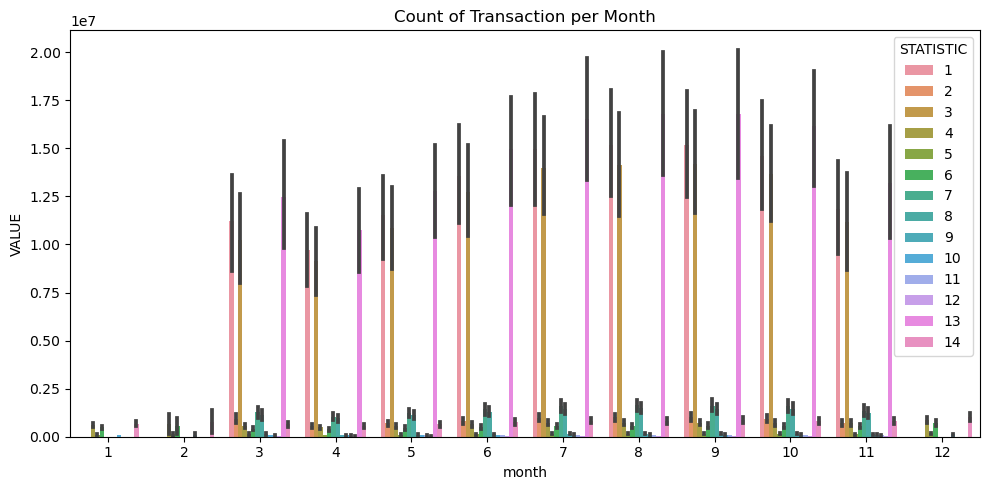

In [21]:
# Plot the distribution
fig, ax = plt.subplots(1,1, figsize=(10,5)) # create a plot grid to view all at once
ax.set_title("Count of Transaction per Month") # Set graph title 
g = sns.barplot(data=df3, x="month", y="VALUE", hue="STATISTIC", ax=ax) 
plt.tight_layout()